# BERT ALBERT ELMO ELECTRA XLNET GLOVE Embeddings and Part of Speech in 1 Line of code!
## With T-SNE visualization and Comparison

# References

- [BERT Paper](https://arxiv.org/pdf/1810.04805.pdf)
- [ALBERT Paper](https://openreview.net/forum?id=H1eA7AEtvS)
- [ELMO Paper](https://arxiv.org/abs/1802.05365)
- [ELECTRA Paper](https://arxiv.org/abs/2003.10555)
- [XLNET Paper](https://arxiv.org/pdf/1906.08237.pdf)
- [GLOVE Paper](https://nlp.stanford.edu/pubs/glove.pdf)

# 1. Install Java and NLU

In [1]:

import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu  > /dev/null    




#### Set plotting styles

In [2]:
# set some styles for for Plotting
import seaborn as sns
# Style Plots a bit
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth": 2.5})

%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20, 14)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#  2. Load Model and Embed sample string

In [3]:
import nlu
pipe = nlu.load('bert electra elmo glove xlnet albert pos')
pipe.predict('He was suprised by the diversity of NLU')

small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
electra_small_uncased download started this may take some time.
Approximate size to download 48.7 MB
[OK!]
elmo download started this may take some time.
Approximate size to download 334.1 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
xlnet_base_cased download started this may take some time.
Approximate size to download 415.8 MB
[OK!]
albert_base_uncased download started this may take some time.
Approximate size to download 42.7 MB
[OK!]
pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]


,token,elmo_embeddings,bert_embeddings,glove_embeddings,pos,albert_embeddings,xlnet_embeddings,electra_embeddings
origin_index,,,,,,,,
0,He,"[-0.027567915618419647, -0.47845372557640076, ...","[-2.1787033081054688, 0.7735096216201782, 0.07...","[0.12250000238418579, -0.05883299931883812, 0....",PRP,"[0.5267688035964966, -1.488020896911621, 0.871...","[-0.7367870211601257, -2.1186609268188477, -0....","[0.29674118757247925, -0.21371901035308838, -0..."
0,was,"[0.2980785369873047, -0.07382500916719437, -0....","[-0.9244779348373413, 0.8572148680686951, -0.2...","[0.1371700018644333, -0.5428699851036072, 0.19...",VBD,"[0.7045632004737854, -0.9757150411605835, 2.21...","[-3.040234088897705, 0.35242924094200134, -0.0...","[-0.4278324842453003, -0.5352790951728821, -0...."
0,suprised,"[0.28243350982666016, -0.07471296936273575, 0....","[-0.6023585200309753, -0.03248468041419983, -0...","[-0.4543200135231018, 0.25780999660491943, -0....",VBN,"[-1.736527919769287, -0.009283807128667831, -0...","[-0.1120433658361435, -1.0880558490753174, 1.0...","[-0.30905699729919434, 0.8737556338310242, -1...."
0,by,"[0.42076045274734497, 0.40719351172447205, -0....","[-1.153778076171875, 1.1813395023345947, 0.517...","[-0.20874999463558197, -0.11739999800920486, 0...",IN,"[0.41001808643341064, -0.18644540011882782, -2...","[-1.7160836458206177, 0.05957585945725441, -0....","[-0.07821184396743774, 0.1308152973651886, 0.1..."
0,the,"[-0.06904851645231247, 0.11261536926031113, 0....","[-1.0956400632858276, 1.2275679111480713, 0.09...","[-0.03819400072097778, -0.24487000703811646, 0...",DT,"[-1.0548335313796997, 0.3515205383300781, 0.73...","[-0.8949741125106812, 0.23544736206531525, -0....","[0.5462876558303833, 0.06833558529615402, -0.4..."
0,diversity,"[-0.1499328762292862, -0.11983472853899002, 1....","[-1.4506102800369263, 0.07174994051456451, 0.1...","[0.11683999747037888, 0.7225300073623657, 0.43...",NN,"[-0.6487351655960083, 0.05633832514286041, -0....","[-0.9674568176269531, -0.5944381952285767, 0.3...","[0.1381235420703888, 0.2956249713897705, 0.250..."
0,of,"[0.24783454835414886, -0.248960942029953, 0.02...","[-0.7573126554489136, 0.5711511373519897, 0.13...","[-0.15289999544620514, -0.24278999865055084, 0...",IN,"[1.8428677320480347, -0.7128390669822693, 0.47...","[-1.4035155773162842, 0.31081825494766235, -0....","[-0.5667577385902405, -0.3955458402633667, -0...."
0,NLU,"[0.08950258791446686, -0.03680119290947914, 0....","[-1.3957831859588623, -0.39878568053245544, 0....","[0.4970400035381317, -0.013454999774694443, 0....",NNP,"[-0.5342512130737305, -0.4011203646659851, -0....","[-0.2549881935119629, -2.276850461959839, 1.17...","[0.5597240924835205, -0.7032498121261597, -1.0..."


# 3. Download Sample dataset

In [4]:
import pandas as pd
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
# Load dataset to Pandas
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')
df

--2020-09-21 01:02:36--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.68.78
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.68.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  34.7MB/s    in 7.6s    

2020-09-21 01:02:44 (32.1 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


# 4. Visualize Embeddings with T-SNE




Lets add Sentiment Part Of Speech to our pipeline because its so easy and so we can hue our T-SNE plots by POS and Sentiment       

In [5]:
predictions = pipe.predict(df[['comment','label']].iloc[0:500], output_level='token')
predictions

,token,elmo_embeddings,bert_embeddings,glove_embeddings,pos,text,label,albert_embeddings,xlnet_embeddings,electra_embeddings
origin_index,,,,,,,,,,
0,NC,"[0.4888951778411865, 0.02264561504125595, -0.4...","[-1.4623265266418457, 1.3096604347229004, -0.4...","[-0.872219979763031, -0.24943000078201294, 1.0...",NNP,NC and NH.,0,"[-0.7502232789993286, -0.2700745761394501, -0....","[0.6400730609893799, -0.27778854966163635, -0....","[-0.7255734801292419, -0.22143462300300598, -1..."
0,and,"[-0.02477884292602539, -0.20155462622642517, -...","[-1.0246961116790771, 0.7884305715560913, -0.6...","[-0.07195299863815308, 0.23127000033855438, 0....",CC,NC and NH.,0,"[0.889356791973114, -0.9173175096511841, 0.306...","[0.7884323596954346, -1.5079097747802734, 0.67...","[0.9136509895324707, -0.6609441637992859, 1.82..."
0,NH,"[0.010294198989868164, -0.7602927684783936, 0....","[-1.454894781112671, 0.6408094167709351, -0.98...","[-0.8070999979972839, 0.029627999290823936, 1....",NNP,NC and NH.,0,"[-1.3560717105865479, -0.22673530876636505, 0....","[-0.2549888491630554, -2.2768502235412598, 1.1...","[-0.17750510573387146, 0.1729716807603836, -0...."
0,.,"[-0.8871510028839111, -0.20039957761764526, -1...","[-0.4392947256565094, 0.8077086210250854, -0.3...","[-0.3397899866104126, 0.20940999686717987, 0.4...",.,NC and NH.,0,"[-0.3477928340435028, -0.18007326126098633, 0....","[-0.8349902033805847, -0.4562772214412689, -0....","[-0.8140677809715271, -1.3282318115234375, -0...."
1,You,"[0.61176598072052, -0.18037298321723938, -0.66...","[-1.1534700393676758, 0.9713523983955383, -0.5...","[-0.4988600015640259, 0.7660199999809265, 0.89...",PRP,You do know west teams play against west teams...,0,"[-0.49157658219337463, 0.705510675907135, 1.84...","[1.2179219722747803, -1.5724619626998901, 0.31...","[0.5211188197135925, -0.31209391355514526, -0...."
...,...,...,...,...,...,...,...,...,...,...
499,for,"[-0.2415028065443039, 0.05413343757390976, -0....","[-0.6388859152793884, 1.3001959323883057, -0.8...","[-0.1440100073814392, 0.3255400061607361, 0.14...",IN,Hard drive requirements tend to include extra ...,0,"[0.6374993324279785, 0.3995458483695984, -0.77...","[0.12577177584171295, -2.9093310832977295, -1....","[0.21687787771224976, -0.7357984185218811, 0.4..."
499,the,"[-0.06904851645231247, 0.11261536926031113, 0....","[-0.4678226709365845, 1.8508615493774414, -0.5...","[-0.03819400072097778, -0.24487000703811646, 0...",DT,Hard drive requirements tend to include extra ...,0,"[-1.0179429054260254, 0.9191049933433533, 1.71...","[-0.8949751853942871, 0.23544716835021973, -0....","[-0.03524321690201759, 0.09007474780082703, 0...."
499,file,"[0.021550625562667847, 0.38065245747566223, -0...","[-0.6004695892333984, 0.780785083770752, -0.12...","[-0.6050300002098083, 0.35631999373435974, 0.1...",NN,Hard drive requirements tend to include extra ...,0,"[-0.5016559362411499, -1.022269606590271, 1.12...","[-1.0581018924713135, -1.4315071105957031, 0.4...","[0.12143111228942871, -0.46588242053985596, 0...."


# 5. Prepare data for T-SNE algorithm.
We create a Matrix with one row per Embedding vector for T-SNE algorithm

In [6]:
from sklearn.manifold import TSNE
import numpy as np

def get_tsne_df(predictions,embd_column, hue_column='label'):
  # cast column to np aray and generate TSNE embedding and store them into DF with labelr eady for hue plot
  # Some rows contain NONE text as result of preprocessing, thus we have some NA embeddings and drop them
  predictions.dropna(how='any', inplace=True)
  # We first create a column of type np array
  predictions['np_array'] = predictions[embd_column].apply(lambda x: np.array(x))
  # Make a matrix from the vectors in the np_array column via list comprehension
  mat = np.matrix([x for x in predictions.np_array])

  # Fit and transform T-SNE algorithm
  model = TSNE(n_components=2) #n_components means the lower dimension
  low_dim_data = model.fit_transform(mat)

  return pd.DataFrame(low_dim_data, predictions[hue_column].replace({1:'sarcasm',0:'normal'}))

# HUED on sarcasm_labelS
t_bert_sarcasm = get_tsne_df(predictions,'bert_embeddings')
t_albert_sarcasm = get_tsne_df(predictions,'albert_embeddings')
t_electra_sarcasm = get_tsne_df(predictions,'electra_embeddings')
t_glove_sarcasm = get_tsne_df(predictions,'glove_embeddings')
t_elmo_sarcasm = get_tsne_df(predictions,'elmo_embeddings')
t_xlnet_sarcasm = get_tsne_df(predictions,'xlnet_embeddings')


# hue on POS
t_bert_pos = get_tsne_df(predictions,'bert_embeddings',hue_column='pos')
t_albert_pos = get_tsne_df(predictions,'albert_embeddings',hue_column='pos')
t_electra_pos = get_tsne_df(predictions,'electra_embeddings',hue_column='pos')
t_glove_pos = get_tsne_df(predictions,'glove_embeddings',hue_column='pos')
t_elmo_pos = get_tsne_df(predictions,'elmo_embeddings',hue_column='pos')
t_xlnet_pos = get_tsne_df(predictions,'xlnet_embeddings',hue_column='pos')

# 6. Compare 6 Embeddings with hue on Part of Speech(POS) label

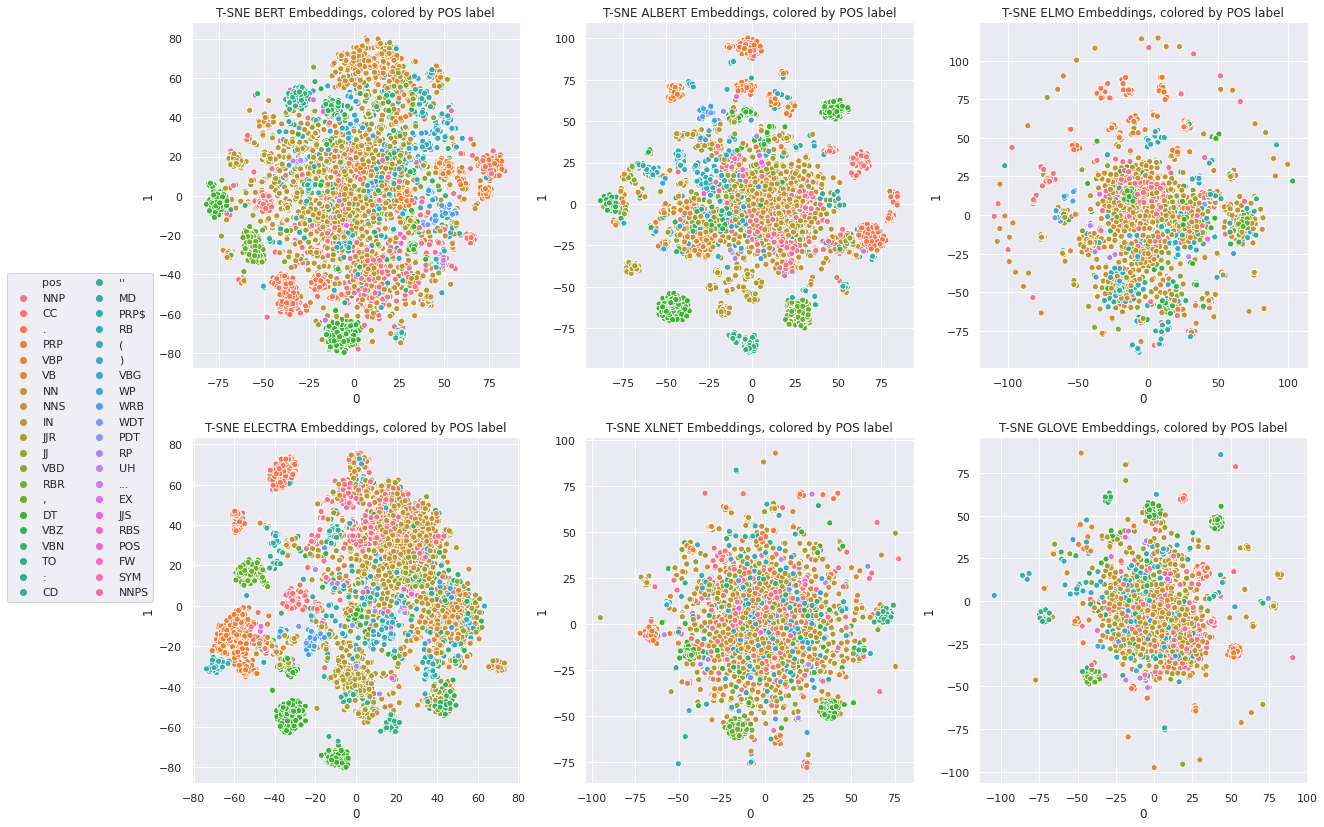

In [7]:
# Plot multiple t-snes
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3,nrows=2)

ax = sns.scatterplot(data=t_bert_pos, x=0, y=1, hue=t_bert_pos.index, ax=axs[0][0])
ax.set_title('T-SNE BERT Embeddings, colored by POS label')
ax.get_legend().remove()

ax = sns.scatterplot(data=t_albert_pos, x=0, y=1, hue=t_albert_pos.index, ax=axs[0][1])
ax.set_title('T-SNE ALBERT Embeddings, colored by POS label')
ax.get_legend().remove()

ax = sns.scatterplot(data=t_elmo_pos, x=0, y=1, hue=t_elmo_pos.index, ax=axs[0][2])
ax.set_title('T-SNE ELMO Embeddings, colored by POS label')
ax.get_legend().remove()


ax = sns.scatterplot(data=t_electra_pos, x=0, y=1, hue=t_electra_pos.index, ax=axs[1][0])
ax.set_title('T-SNE ELECTRA Embeddings, colored by POS label')
ax.get_legend().remove()


ax = sns.scatterplot(data=t_xlnet_pos, x=0, y=1, hue=t_xlnet_pos.index, ax=axs[1][1])
ax.set_title('T-SNE XLNET Embeddings, colored by POS label')
ax.get_legend().remove()

ax = sns.scatterplot(data=t_glove_pos, x=0, y=1, hue=t_glove_pos.index, ax=axs[1][2])
ax.set_title('T-SNE GLOVE Embeddings, colored by POS label')
# ax.legend(frameon=False, loc='lower right', ncol=2)
# axs.legend = ax.legend
# ax.legend(loc='center left', bbox_to_anchor=(1, 1), ncol=3)
ax.legend(loc='center right', bbox_to_anchor=(-2.5, 1), ncol=2)

# from matplotlib.font_manager import FontProperties

# fontP = FontProperties()
# fontP.set_size('xx-small')

# plt.legend(handles=[ax], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)


# 7 Compare 6 Embedding with hue on Sarcasm Label

Text(0.5, 1.0, 'T-SNE GLOVE Embeddings, colored by Sarcasm label')

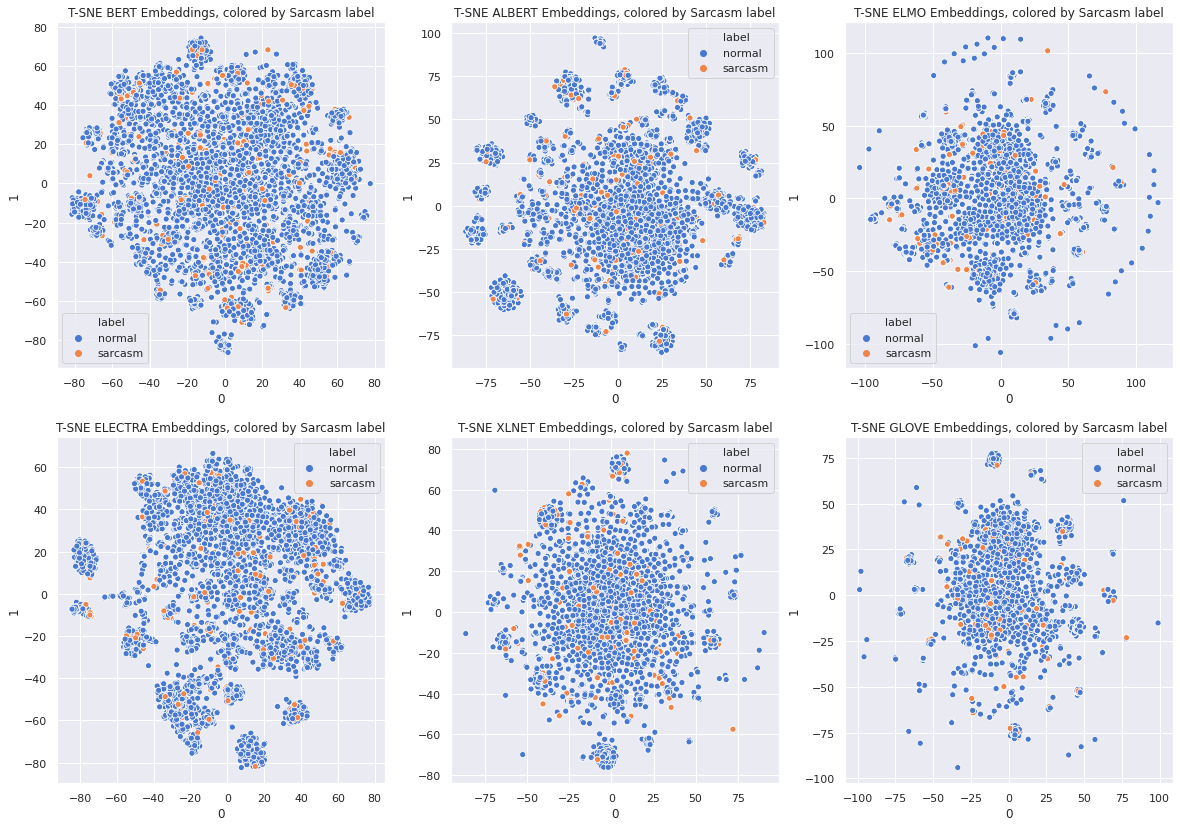

In [8]:
# Plot multiple t-snes
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3,nrows=2)

ax = sns.scatterplot(data=t_bert_sarcasm, x=0, y=1, hue=t_bert_sarcasm.index, ax=axs[0][0])
ax.set_title('T-SNE BERT Embeddings, colored by Sarcasm label')

ax = sns.scatterplot(data=t_albert_sarcasm, x=0, y=1, hue=t_albert_sarcasm.index, ax=axs[0][1])
ax.set_title('T-SNE ALBERT Embeddings, colored by Sarcasm label')

ax = sns.scatterplot(data=t_elmo_sarcasm, x=0, y=1, hue=t_elmo_sarcasm.index, ax=axs[0][2])
ax.set_title('T-SNE ELMO Embeddings, colored by Sarcasm label')


ax = sns.scatterplot(data=t_electra_sarcasm, x=0, y=1, hue=t_electra_sarcasm.index, ax=axs[1][0])
ax.set_title('T-SNE ELECTRA Embeddings, colored by Sarcasm label')


ax = sns.scatterplot(data=t_xlnet_sarcasm, x=0, y=1, hue=t_xlnet_sarcasm.index, ax=axs[1][1])
ax.set_title('T-SNE XLNET Embeddings, colored by Sarcasm label')

ax = sns.scatterplot(data=t_glove_sarcasm, x=0, y=1, hue=t_glove_sarcasm.index, ax=axs[1][2])
ax.set_title('T-SNE GLOVE Embeddings, colored by Sarcasm label')



# 8. NLU has many more embeddings! models!

Make sure to try them all out!       
You can change referemce in nlu.load('bert electra elmo glove xlnet albert pos').predict(data)  to bert, xlnet, albert or any other of the **100+ word embeddings** offerd by NLU

In [9]:
nlu.print_all_model_kinds_for_action('embed')

For language <en> NLU provides the following Models : 
nlu.load('en.embed') returns Spark NLP model glove_100d
nlu.load('en.embed.glove') returns Spark NLP model glove_100d
nlu.load('en.embed.glove.100d') returns Spark NLP model glove_100d
nlu.load('en.embed.bert') returns Spark NLP model bert_base_uncased
nlu.load('en.embed.bert.base_uncased') returns Spark NLP model bert_base_uncased
nlu.load('en.embed.bert.base_cased') returns Spark NLP model bert_base_cased
nlu.load('en.embed.bert.large_uncased') returns Spark NLP model bert_large_uncased
nlu.load('en.embed.bert.large_cased') returns Spark NLP model bert_large_cased
nlu.load('en.embed.biobert') returns Spark NLP model biobert_pubmed_base_cased
nlu.load('en.embed.biobert.pubmed_base_cased') returns Spark NLP model biobert_pubmed_base_cased
nlu.load('en.embed.biobert.pubmed_large_cased') returns Spark NLP model biobert_pubmed_large_cased
nlu.load('en.embed.biobert.pmc_base_cased') returns Spark NLP model biobert_pmc_base_cased
nlu.lo